In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne import read_epochs
from sklearn.preprocessing import LabelEncoder
from jupyterthemes.stylefx import set_nb_theme
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
set_nb_theme('gruvboxd')

In [4]:
epochs = read_epochs('nirs_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\dnn\nirs_epo.fif ...
    Found the data of interest:
        t =   -4992.00 ...   19968.00 ms
        0 CTF compensation matrices available
Not setting metadata
73 matching events found
No baseline correction applied
0 projection items activated


In [5]:
epochs['rest','left']

Number of events,24
Events,left: 12rest: 12
Time range,-4.992 – 19.968 sec
Baseline,-3.000 – 0.000 sec


In [6]:
data = epochs['left','rest'].copy().crop(5,12).to_data_frame()


In [7]:
data

,time,condition,epoch,S1_D1 hbo,S1_D1 hbr,S1_D3 hbo,S1_D3 hbr,S2_D2 hbo,S2_D2 hbr,S2_D3 hbo,...,S7_D3 hbo,S7_D3 hbr,S7_D4 hbo,S7_D4 hbr,S8_D1 hbo,S8_D1 hbr,S8_D3 hbo,S8_D3 hbr,S8_D4 hbo,S8_D4 hbr
0,4.992,rest,1,0.336716,-4.421943,-474.708970,549.056276,41.010277,-79.877304,-71.510476,...,11.159389,-24.489582,0.376992,11.774830,3.900911,-225.348878,-78.978395,59.234739,-306.504284,331.897463
1,5.120,rest,1,-0.468727,-2.929550,-445.332844,514.443440,33.780867,-72.223316,-28.331013,...,13.117789,-24.392402,0.984644,12.006241,56.592129,-319.099257,-57.336758,39.295363,-192.791631,251.385529
2,5.248,rest,1,-1.417139,-1.288509,-345.014210,402.910751,24.054789,-61.566003,6.820184,...,14.002158,-23.458111,2.374965,11.286596,121.656871,-417.076488,-40.372055,26.467573,-77.313918,161.226431
3,5.376,rest,1,-2.302057,0.245680,-178.610033,222.756164,11.400823,-47.220004,26.078780,...,13.942687,-22.086688,4.332763,9.827912,188.015634,-502.149633,-29.313074,20.872041,22.203616,75.535165
4,5.504,rest,1,-2.933017,1.433583,36.286670,-4.322274,-4.071736,-29.011750,25.436439,...,13.195604,-20.705120,6.546923,7.964360,244.071969,-559.211941,-24.736282,21.724494,87.953900,10.334894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,11.520,rest,91,8.042055,-0.875321,549.945689,-578.165345,-6.375256,-5.467551,387.693901,...,-10.027356,-26.292208,8.488554,56.655736,366.813067,-432.461267,-103.050639,44.122200,450.441497,-487.265817
1340,11.648,rest,91,7.169722,-0.746168,540.512439,-555.342063,-4.347844,-10.246376,339.243095,...,-11.645019,-27.065580,8.295267,53.535550,482.456497,-519.459019,-108.522494,70.713577,505.980104,-448.438659
1341,11.776,rest,91,6.670356,-0.981544,542.024791,-544.339826,-1.919106,-15.332034,271.659810,...,-14.766394,-25.794065,8.455444,50.158080,566.294533,-577.118364,-111.190202,87.128879,476.101966,-312.340300
1342,11.904,rest,91,6.539974,-1.588076,562.807138,-557.634106,-0.454440,-18.882021,190.546270,...,-19.104134,-22.636747,8.778118,46.870020,604.311703,-595.133926,-109.066736,89.836314,364.542997,-96.260606


In [8]:
hbo_cols = [col for col in data.columns if 'hbo' in col ]

In [9]:
mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
maxi = data.groupby('epoch')[hbo_cols].max()
mini = data.groupby('epoch')[hbo_cols].min()
skw = data.groupby('epoch')[hbo_cols].skew()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_17232\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_17232\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_17232\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_17232\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in

In [10]:
mean

,,S1_D1 hbo,S1_D3 hbo,S2_D2 hbo,S2_D3 hbo,S2_D4 hbo,S3_D1 hbo,S3_D2 hbo,S3_D3 hbo,S4_D2 hbo,S4_D4 hbo,S5_D1 hbo,S5_D3 hbo,S6_D2 hbo,S6_D4 hbo,S7_D2 hbo,S7_D3 hbo,S7_D4 hbo,S8_D1 hbo,S8_D3 hbo,S8_D4 hbo
epoch,condition,,,,,,,,,,,,,,,,,,,,
1,rest,3.423851,332.234128,51.767241,148.218813,339.344226,3.896167,274.065149,6.676597,135.139171,615.869679,3.520300,6.419292,510.186507,109.466496,66.934411,9.908570,5.223940,404.060438,90.797656,352.269208
3,left,2.980257,403.238545,41.678228,157.623664,298.664621,4.480407,167.507156,9.841207,167.212071,228.628603,3.890412,12.542887,458.504799,87.500255,103.266377,12.292376,7.228494,312.465792,93.660571,262.849030
9,rest,2.901416,375.069818,50.941837,131.165639,358.757059,6.108933,231.579210,15.605284,82.003545,265.435453,5.151955,14.445783,307.186510,155.159818,117.113383,14.735943,14.054451,149.607171,34.576583,380.958041
11,rest,2.748274,299.385227,65.632011,219.109680,259.591054,5.441525,177.457801,13.935475,136.173111,388.781650,4.733010,11.904213,583.189488,236.379751,96.136085,17.696812,13.413043,346.676535,44.857120,400.249688
13,left,3.444287,282.417597,39.310384,226.966540,173.859017,7.428879,367.187943,16.244371,80.470724,418.712888,6.867987,12.587693,424.180680,77.171087,81.358557,16.528301,11.790607,315.832658,60.104465,288.456114
17,rest,3.551731,347.864602,58.613484,271.729632,445.641498,4.236273,408.620551,14.332448,120.471252,540.533338,1.487814,8.079496,276.192985,81.058457,122.054389,8.425267,6.213663,278.748141,55.013196,353.880546
21,left,4.354748,264.934283,43.550993,204.590227,405.784065,6.173394,290.490907,13.828132,103.583291,435.658385,4.476389,11.442013,480.380145,127.672787,61.488352,18.000173,11.453456,238.048378,42.764434,366.616715
24,left,3.102902,263.488655,48.803504,217.687719,287.893952,3.629702,316.863669,9.749075,106.881974,445.816721,2.408980,6.952931,367.990748,87.240544,79.787190,11.578449,4.023830,450.277844,65.267644,342.963649
25,left,1.213926,340.000952,61.244756,97.703403,306.458951,6.214090,176.929801,10.884224,103.691570,432.726661,3.708902,6.194848,276.903511,151.823943,116.652180,13.072700,4.985291,362.229824,27.295726,200.587672


In [11]:
grouped = mean.groupby(['epoch','condition']).count()

In [12]:
grouped.index.values
y = [i[1] for i in grouped.index.values]

In [13]:
grouped.index.values

array([(1, 'rest'), (3, 'left'), (9, 'rest'), (11, 'rest'), (13, 'left'),
       (17, 'rest'), (21, 'left'), (24, 'left'), (25, 'left'),
       (27, 'rest'), (39, 'rest'), (50, 'rest'), (51, 'left'),
       (55, 'left'), (66, 'rest'), (69, 'rest'), (70, 'left'),
       (75, 'left'), (78, 'left'), (79, 'rest'), (86, 'left'),
       (87, 'rest'), (88, 'left'), (91, 'rest')], dtype=object)

In [14]:
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=34)
lda = LinearDiscriminantAnalysis()

In [16]:
scores_m = cross_val_score(lda, mean.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [17]:
scores_mx = cross_val_score(lda, maxi.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [18]:
scores_mn = cross_val_score(lda, mini.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [19]:
scores_sk = cross_val_score(lda, skw.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [20]:
scores = [scores_m, scores_mx, scores_mn, scores_sk]

In [21]:
scores_df = pd.DataFrame(data=np.transpose(scores), columns=['mean','max','min','skew'])

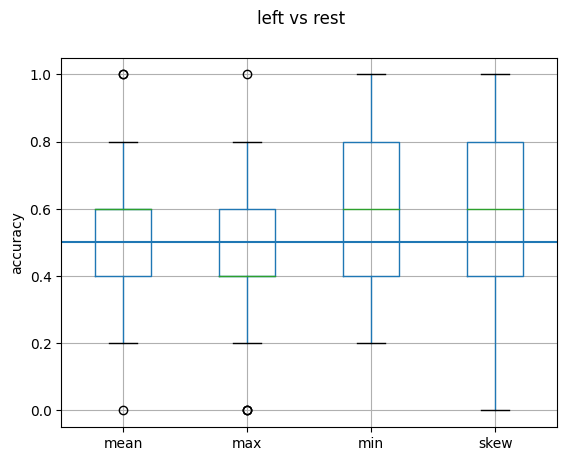

In [22]:
csp_fig, axes = plt.subplots(1)
scores_df.boxplot(ax=axes)
axes.axhline(0.5)
axes.set_ylabel('accuracy')
csp_fig.suptitle('left vs rest')
plt.show()

In [23]:
scores_df.median().to_numpy()

array([0.6, 0.4, 0.6, 0.6])